# Visualize Single-Trial Neuronal Activity from Fish1.5 Dataset

This notebook loads data from the Fish1.5 HDF5 functional dataset and visualizes trial-by-trial ΔF/F responses for a single neuron to two stimulus types:
- Random dot motion
- Sine gratings

In [ ]:
## Setup

import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# User parameters
neuron_id = 9978  # <- Change this to view a different neuron
dt = 0.5  # time step in seconds

In [ ]:
# Functional data: REPLACE THIS WITH YOU PATH
hdf5_file_path = "/Users/jonathanboulanger-weill/Code/fish1.5_scripts/data/fish1.5_functional_data.h5"

In [14]:
## Load Neuron Data

with h5py.File(hdf5_file_path, "r") as hdf_file:
    neuron_group = hdf_file[f"neuron_{neuron_id}"]
    left_dots = neuron_group["dff_trials_left_dots"][()]
    right_dots = neuron_group["dff_trials_right_dots"][()]
    left_sine = neuron_group["dff_trials_left_sine"][()]
    right_sine = neuron_group["dff_trials_right_sine"][()]

In [15]:
## Create Time Axis

n_timepoints = left_dots.shape[1]
time_axis = np.arange(n_timepoints) * dt

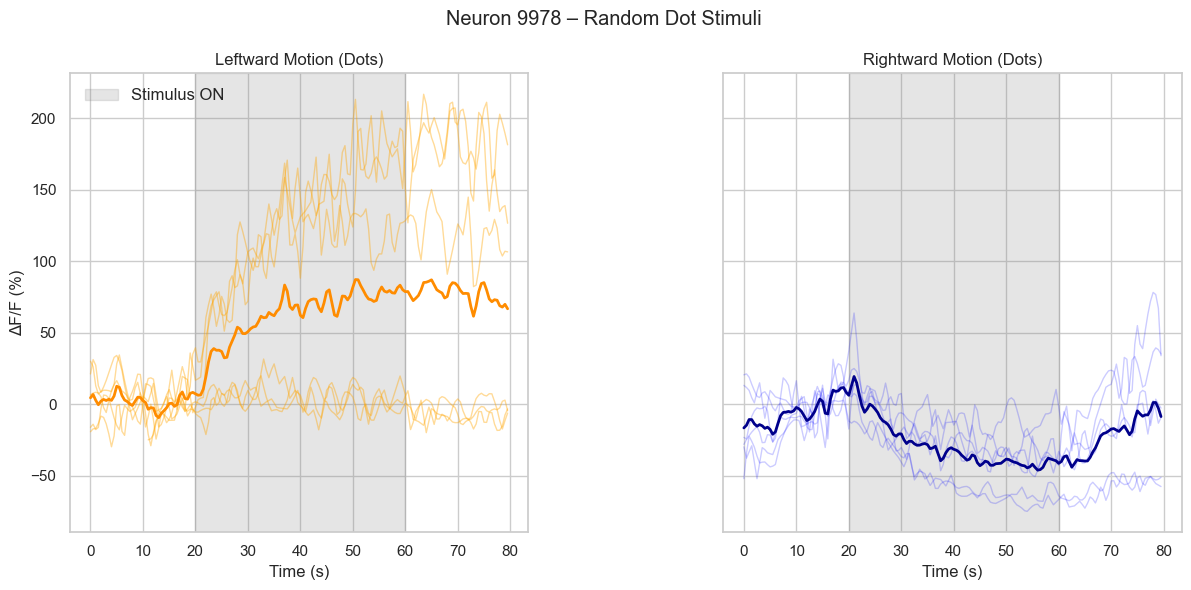

In [30]:
## Plot Trials – Random Dots

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot leftward motion (dots)
for trial in left_dots:
    ax[0].plot(time_axis, trial, color='orange', alpha=0.4, linewidth=1)
mean_left = np.nanmean(left_dots, axis=0)
ax[0].plot(time_axis, mean_left, color='darkorange', linewidth=2)
ax[0].axvspan(20, 60, color='gray', alpha=0.2,label='Stimulus ON')
ax[0].set_title("Leftward Motion (Dots)")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("ΔF/F (%)")
ax[0].legend(loc='upper left', frameon=False, fontsize=12)

# Plot rightward motion (dots)
for trial in right_dots:
    ax[1].plot(time_axis, trial, color='blue', alpha=0.2, linewidth=1)
mean_right = np.nanmean(right_dots, axis=0)
ax[1].plot(time_axis, mean_right, color='darkblue', linewidth=2)
ax[1].axvspan(20, 60, color='gray', alpha=0.2)
ax[1].set_title("Rightward Motion (Dots)")
ax[1].set_xlabel("Time (s)")

# Set square aspect ratio and remove grid lines
for axis in ax:
    axis.set_box_aspect(1)            # square plot box

plt.suptitle(f"Neuron {neuron_id} – Random Dot Stimuli")
plt.tight_layout()
plt.show()

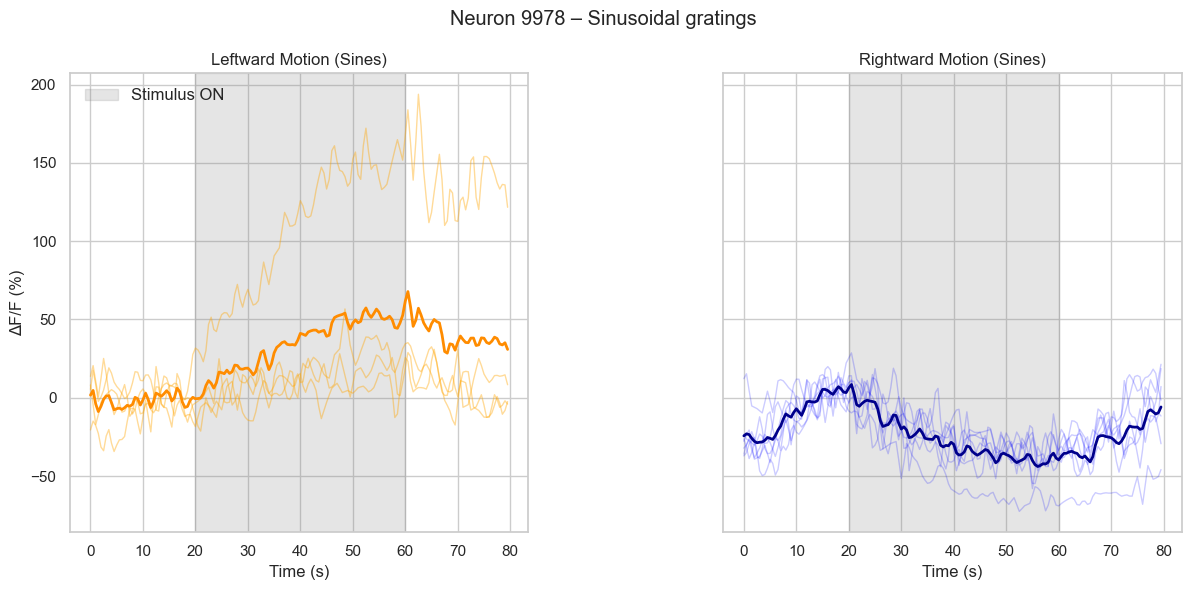

In [31]:
## Plot Trials – Random Dots

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot leftward motion (Sines)
for trial in left_sine:
    ax[0].plot(time_axis, trial, color='orange', alpha=0.4, linewidth=1)
mean_left = np.nanmean(left_sine, axis=0)
ax[0].plot(time_axis, mean_left, color='darkorange', linewidth=2)
ax[0].axvspan(20, 60, color='gray', alpha=0.2,label='Stimulus ON')
ax[0].set_title("Leftward Motion (Sines)")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("ΔF/F (%)")
ax[0].legend(loc='upper left', frameon=False, fontsize=12)

# Plot rightward motion (Sines)
for trial in right_sine:
    ax[1].plot(time_axis, trial, color='blue', alpha=0.2, linewidth=1)
mean_right = np.nanmean(right_sine, axis=0)
ax[1].plot(time_axis, mean_right, color='darkblue', linewidth=2)
ax[1].axvspan(20, 60, color='gray', alpha=0.2)
ax[1].set_title("Rightward Motion (Sines)")
ax[1].set_xlabel("Time (s)")

# Set square aspect ratio and remove grid lines
for axis in ax:
    axis.set_box_aspect(1)            # square plot box

plt.suptitle(f"Neuron {neuron_id} – Sinusoidal gratings")
plt.tight_layout()
plt.show()